# Análisis de Comentarios de Uber

Este notebook analiza el dataset `dataset_uber_comments.csv` para explorar patrones en los comentarios de los usuarios.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import string

# Cargar el dataset
df = pd.read_csv("dataset_uber_comments.csv")

# Mostrar las primeras filas
df.head()


,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,Unnamed: 10,Unnamed: 11
0,User_0,NaN,Good,5,0,455.610.005,2024-12-18 17:17:19,NaN,NaN,455.610.005,NaN,NaN
1,User_1,NaN,Nice,5,0,455.610.005,2024-12-18 17:17:17,NaN,NaN,455.610.005,NaN,NaN
2,User_2,NaN,Very convenient,5,0,453.210.001,2024-12-18 17:09:42,NaN,NaN,453.210.001,NaN,NaN
3,User_3,NaN,Good,4,0,455.610.005,2024-12-18 17:08:27,NaN,NaN,455.610.005,NaN,NaN
4,User_4,NaN,exllence,5,0,455.610.005,2024-12-18 17:08:16,NaN,NaN,455.610.005,NaN,NaN


## Información General del Dataset

Mostramos la estructura del dataset, incluyendo los tipos de datos y estadísticas básicas.


In [3]:
# Información general del dataset
df.info()
# Resumen estadístico de las variables numéricas
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   userName              12000 non-null  object 
 1   userImage             0 non-null      float64
 2   content               12000 non-null  object 
 3   score                 12000 non-null  int64  
 4   thumbsUpCount         12000 non-null  int64  
 5   reviewCreatedVersion  10260 non-null  object 
 6   at                    12000 non-null  object 
 7   replyContent          33 non-null     object 
 8   repliedAt             33 non-null     object 
 9   appVersion            10260 non-null  object 
 10  Unnamed: 10           0 non-null      float64
 11  Unnamed: 11           1016 non-null   float64
dtypes: float64(3), int64(2), object(7)
memory usage: 1.1+ MB


,userImage,score,thumbsUpCount,Unnamed: 10,Unnamed: 11
count,0.0,12000.000000,12000.000000,0.0,1016.000000
mean,NaN,3.925417,0.517000,NaN,3.463583
std,NaN,1.658940,6.298268,NaN,1.027049
min,NaN,1.000000,0.000000,NaN,1.000000
25%,NaN,3.000000,0.000000,NaN,4.000000
50%,NaN,5.000000,0.000000,NaN,4.000000
75%,NaN,5.000000,0.000000,NaN,4.000000
max,NaN,5.000000,239.000000,NaN,4.000000


## Distribución de Puntajes

Visualización de la distribución de los puntajes otorgados por los usuarios.


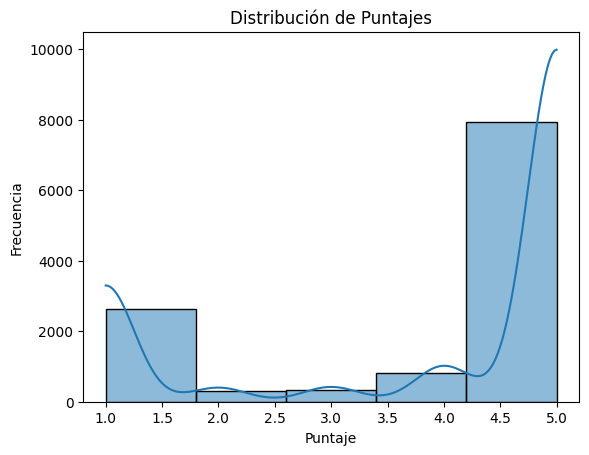

In [4]:
sns.histplot(df['score'], bins=5, kde=True)
plt.title('Distribución de Puntajes')
plt.xlabel('Puntaje')
plt.ylabel('Frecuencia')
plt.show()


## Cantidad de Comentarios por Versión de la App

Análisis de cuántos comentarios se han hecho en las distintas versiones de la aplicación.


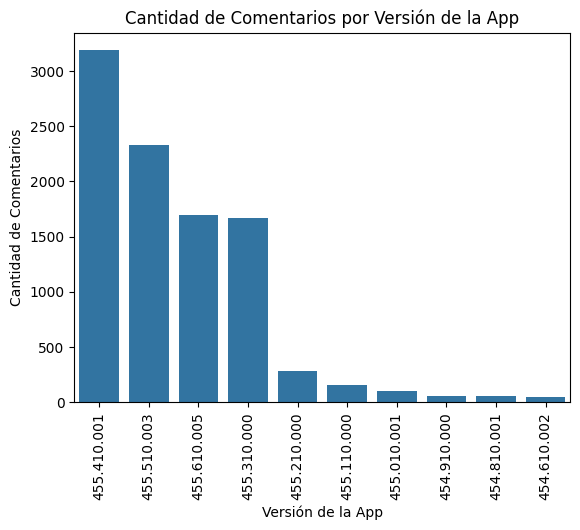

In [5]:
version_counts = df['appVersion'].value_counts().head(10)
sns.barplot(x=version_counts.index, y=version_counts.values)
plt.xticks(rotation=90)
plt.title('Cantidad de Comentarios por Versión de la App')
plt.xlabel('Versión de la App')
plt.ylabel('Cantidad de Comentarios')
plt.show()


## Relación entre Puntaje y Cantidad de Likes

Explora cómo varían los "me gusta" en función del puntaje otorgado.


In [ ]:
sns.boxplot(x=df['score'], y=df['thumbsUpCount'])
plt.yscale('log')
plt.title('Distribución de Likes según Puntaje')
plt.xlabel('Puntaje')
plt.ylabel('Cantidad de Likes')
plt.show()


## Análisis de Comentarios Respondidos

Visualización de la cantidad de comentarios que han recibido una respuesta de la empresa.


In [ ]:
df['respondido'] = df['replyContent'].notna()
sns.countplot(x=df['respondido'])
plt.title('Comentarios Respondidos vs No Respondidos')
plt.xticks(ticks=[0,1], labels=['No', 'Sí'])
plt.show()


## Nube de Palabras en Comentarios

Muestra una nube de palabras basada en los términos más utilizados en los comentarios.


In [ ]:
def clean_text(text):
    if isinstance(text, str):
        text = text.lower().translate(str.maketrans('', '', string.punctuation))
        return text
    return ""

df['clean_content'] = df['content'].apply(clean_text)
all_words = " ".join(df['clean_content'].dropna()).split()
word_freq = Counter(all_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de Palabras de Comentarios")
plt.show()
